In [152]:
import numpy as np
from pathlib import Path
import struct
import matplotlib.pyplot as plt
import copy
from tqdm import tqdm

In [153]:
dataset_path = Path("./MNIST")
train_img_path = dataset_path/'train-images-idx3-ubyte'
train_lab_path = dataset_path/'train-labels-idx1-ubyte'
test_img_path = dataset_path/'t10k-images-idx3-ubyte'
test_lab_path = dataset_path/'t10k-labels-idx1-ubyte'

In [154]:
with open(train_img_path, "rb") as f:
    struct.unpack(">4i", f.read(16))
    tmp_img = np.fromfile(f, dtype=np.uint8).reshape(-1, 28*28)/255
    train_img = tmp_img[:]
with open(test_img_path, "rb") as f:
    struct.unpack(">4i", f.read(16))
    test_img = np.fromfile(f, dtype=np.uint8).reshape(-1, 28*28)/255
with open(train_lab_path, "rb") as f:
    struct.unpack(">2i", f.read(8))
    tmp_lab = np.fromfile(f, dtype=np.uint8).reshape(-1, 1)
    train_lab = tmp_lab[:]
with open(test_lab_path, "rb") as f:
    struct.unpack(">2i", f.read(8))
    test_lab = np.fromfile(f, dtype=np.uint8).reshape(-1, 1)
# len(train_img)

In [155]:
# FUNCTION: show_image(index)
def show_image(img, index):
    plt.imshow(img[index].reshape(28, 28), cmap='gray')
    plt.pause(1)
    # print("label: {}".format(label[index]))
    return 0
# show_image(train_img, train_lab, 30)
# len(train_lab[np.where(train_lab == 9)])

In [156]:
train_num = train_img.shape[0]
test_num = test_img.shape[0]
print(train_img.shape)
print(test_img.shape)
print(train_lab.shape)
train_lab

(60000, 784)
(10000, 784)
(60000, 1)


array([[5],
       [0],
       [4],
       ...,
       [5],
       [6],
       [8]], dtype=uint8)

### <font color="red"> 警示 </font>：
这里创建训练集合，需要对自己指定的数字，比如数字0，和其他数字进行整体的重新建立。并重新赋予图像标签（手写数字为0的标签为1，表示是数字0；其他手写数字标签为0，表示图片上的数字不是0）
也就是讲label转成，数字0对应label设置为1，表示为数字0；其他数字对应label改为0，表示不是数字0

[[0 1 0 ... 0 0 0]]
train set shape: (784, 60000)
train lab shape: (1, 60000)
test set shape: (784, 10000)
test lab shape: (1, 10000)


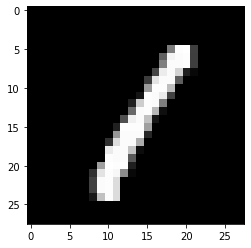

(1, 60000)


5923

In [157]:
# 将给定num的label改为1
def train_setY(num):
    label = train_lab.copy()
    label[np.where(label != num)] = 9
    label[np.where(label == num)] = 1
    label[np.where(label == 9)] = 0
    return label
def test_setY(num):
    label = test_lab.copy()
    label[np.where(label != num)] = 9
    label[np.where(label == num)] = 1
    label[np.where(label == 9)] = 0
    return label
reg_num = 0
limit_train = 60000
limit_test = 10000
train_X = train_img.copy().T[:, :limit_train]
train_Y = train_setY(reg_num).T[:, :limit_train]
print(train_Y)
test_X = test_img.copy().T[:, :limit_test]
test_Y = test_setY(reg_num).T[:, :limit_test]
print(f"train set shape: {train_X.shape}")
print(f"train lab shape: {train_Y.shape}")
print(f"test set shape: {test_X.shape}")
print(f"test lab shape: {test_Y.shape}")

show_image(train_X.T, 3)
# print(train_Y[30])
print(train_Y.shape)
# print(np.where(train_Y==1))
tmp = train_lab.copy().T[:, :limit_train]
len(tmp[np.where(tmp == reg_num)])

## <font color='red'>警示</font>
这里的置换矩阵有问题，在运行模型进行训练后，权重矩阵被替换后基本处于被某一个相同值替换的结果内。

In [176]:
parameters = {
    'a+': 1e-2, 'b+': 3,
    'a-': 1e-2, 'b-': 3,
    'wmax': 1, 'wmin': 0
}
weight_plus_list = [parameters['wmin']]
weight_minus_list = [parameters['wmax']]

def weight_plus(w):
    delta_w = parameters['a+'] * np.exp(-parameters['b+']*(w-parameters['wmin'])
                                             /(parameters['wmax']-parameters['wmin']))
    return w+delta_w
def weight_minus(w):
    delta_w = parameters['a-'] * np.exp(-parameters['b-']*(parameters['wmax']-w)
                                             /(parameters['wmax']-parameters['wmin']))
    return w-delta_w
def equation():
    count_num = 0
    while True:
        weight_plus_list.append(weight_plus(weight_plus_list[-1]))
        weight_minus_list.append(weight_minus(weight_minus_list[-1]))
        count_num += 1
        if weight_plus_list[-1] >= 1:
            break
        elif count_num == 50:
            break
        else:
            continue

    wpl = [0.1*(each - weight_plus_list[0]) / (weight_plus_list[-1]-weight_plus_list[0]) for each in weight_plus_list]
    wml = [0.1*(each - weight_minus_list[-1]) / (weight_minus_list[0]-weight_minus_list[-1]) for each in weight_minus_list]
    
    return np.array(wpl), np.array(wml)
GP, GD = equation()
GD

array([0.1       , 0.09674565, 0.09358748, 0.09051993, 0.08753791,
       0.08463675, 0.08181214, 0.07906014, 0.07637708, 0.07375956,
       0.07120444, 0.06870881, 0.06626994, 0.06388528, 0.06155248,
       0.0592693 , 0.05703368, 0.05484366, 0.05269741, 0.05059321,
       0.04852943, 0.04650454, 0.0445171 , 0.04256573, 0.04064916,
       0.03876615, 0.03691555, 0.03509625, 0.0333072 , 0.03154742,
       0.02981596, 0.02811191, 0.02643442, 0.02478267, 0.02315589,
       0.02155331, 0.01997424, 0.01841799, 0.0168839 , 0.01537136,
       0.01387976, 0.01240853, 0.01095712, 0.009525  , 0.00811166,
       0.00671661, 0.00533939, 0.00397955, 0.00263665, 0.00131026,
       0.        ])

In [178]:
def findGP_num(data, find_array=GP):
    data_array = np.array([data] * len(find_array))
    diff = abs(data_array - find_array)
    index = np.where(diff == np.min(diff))[0][0]
    # print(index)
    return find_array[index]

def findGD_num(data, find_array=GD):
    data_array = np.array([data] * len(find_array))
    diff = abs(data_array - find_array)
    index = np.where(diff == np.min(diff))[0][0]
    return find_array[index]

def each_change(matrix_old, gradw):
    matrix_new = np.zeros(matrix_old.shape)
    for i in range(matrix_old.shape[0]):
        if gradw[i] < 0:
            matrix_new[i] = findGP_num(matrix_old[i])
        else:
            matrix_new[i] = findGD_num(matrix_old[i])
    return matrix_new
a = -0.014
findGD_num(a)

0.0

In [181]:
# 激活函数
def sigmoid(z):
    s = 1.0 / (1.0 + np.exp(-1.0*z))
    return s

# 参数初始化
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0
    
#     plt.imshow(w.reshape((28,28)))
#     plt.pause(1)
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

# 向前传播
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    A = sigmoid(np.dot(w.T, X) + b)
    cost = -(1.0/m) * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))
    
    dw = (1.0/m) * np.dot(X, (A-Y).T)
    db = (1.0/m) * np.sum(A-Y)
    
#     print(f"(A-Y).shape: {(A-Y).shape}")
#     print(f"X.shape: {X.shape}")
#     print(f"w.shape: {w.shape}")
#     print(f"dw.shape: {dw.shape}")
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    grads = {
        "dw": dw,
        "db": db
    }
    
    return grads, cost

# 参数优化
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        
        w[np.where(w<0)] = 0
        w = each_change(w, dw)
        
        if i%100 == 0:
            costs.append(cost)
            print(np.max(w), np.min(w))
#         if i == num_iterations/2 or i == num_iterations-1:
#             w_tmp = w.copy()
#             plt.imshow(w_tmp.reshape((28,28)))
#             plt.pause(1)
        if print_cost and i%100 == 0:
            print("Cost after iterations %i: %f" %(i, cost))
        
    params = {
        "w": w,
        "b": b
    }
    grads = {
        "dw": dw,
        "db": db
    }

    return params, grads, costs

# 模型预测
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        if A[0, i] > 0.5:
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [182]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    w, b = initialize_with_zeros(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    print("train accuracy: {}%".format(100-np.mean(np.abs(Y_prediction_train-Y_train))*100))
    print("test accuracy: {}%".format(100-np.mean(np.abs(Y_prediction_test-Y_test))*100))
    
    d = {
        "costs": costs,
        "Y_prediction_test": Y_prediction_test,
        "Y_prediction_train": Y_prediction_train,
        "w": w,
        "b": b,
        "learning_rate": learning_rate,
        "num_iterations": num_iterations
    }
    
    return d

0.1 0.0
Cost after iterations 0: 0.693147
0.1 0.0
Cost after iterations 100: 8.500366
0.1 0.0
Cost after iterations 200: 8.096252
0.1 0.0
Cost after iterations 300: 7.693235
0.1 0.0
Cost after iterations 400: 7.291862
0.1 0.0
Cost after iterations 500: 6.892900
0.1 0.0
Cost after iterations 600: 6.497392
0.1 0.0
Cost after iterations 700: 6.106688
0.1 0.0
Cost after iterations 800: 5.722447
0.1 0.0
Cost after iterations 900: 5.346589
train accuracy: 12.213333333333338%
test accuracy: 12.400000000000006%


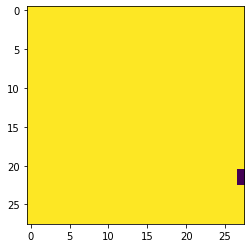

In [183]:
d = model(train_X, train_Y, test_X, test_Y, num_iterations=1000, learning_rate=0.005, print_cost=True)
w = d["w"].copy()
# w[np.where(w<=0)] = 0
plt.imshow(w.reshape((28,28)))